In [1]:
# coding: utf-8

import logging
import sys
sys.path.append('/home/archit/master_project/pybnn')
import numpy as np
import matplotlib.pyplot as plt

import torch

from pybnn import MCDropout
from pybnn.util.normalization import zero_mean_unit_var_normalization, zero_mean_unit_var_denormalization

# plt.rc('text', usetex=True)
if torch.cuda.is_available():
    print(f"Using device {torch.cuda.get_device_name(torch.cuda.current_device())}")

# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

plt.rc('text', usetex=False)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

Using device GeForce GTX 1050 Ti


/home/archit/anaconda3/envs/pybnn/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/archit/anaconda3/envs/pybnn/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/archit/anaconda3/envs/pybnn/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/archit/anaconda3/envs/

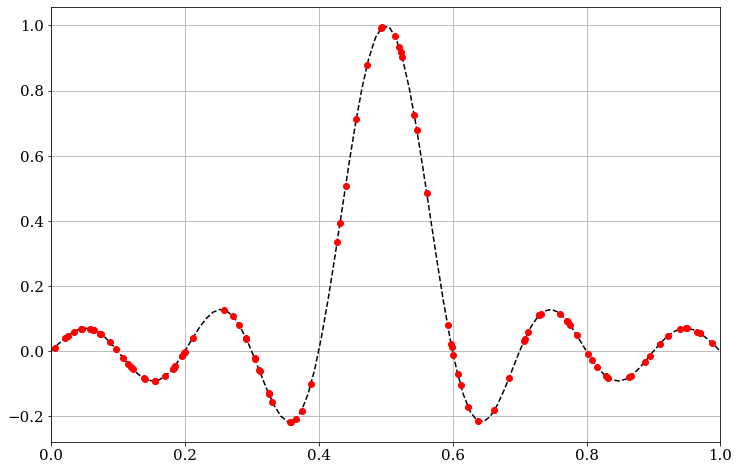

In [2]:
def f(x):
    return np.sinc(x * 10 - 5)



rng = np.random.RandomState(42)

x = rng.rand(100)
y = f(x)

grid = np.linspace(0, 1, 100)
fvals = f(grid)

plt.plot(grid, fvals, "k--")
plt.plot(x, y, "ro")
plt.grid()
plt.xlim(0, 1)

plt.show()

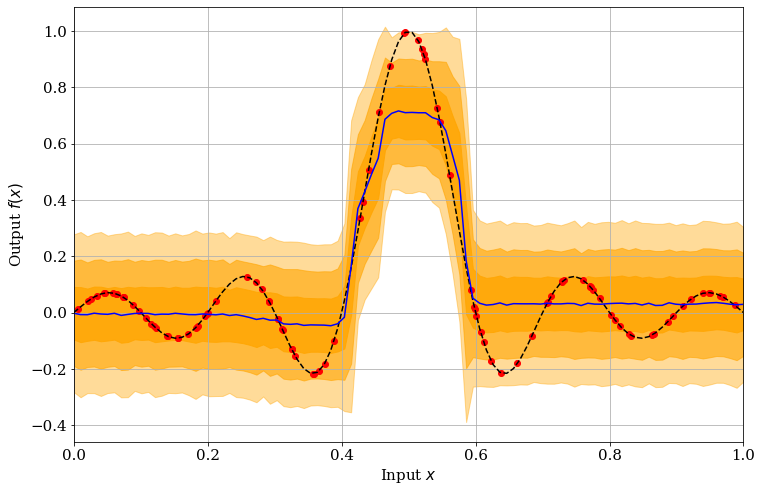

In [3]:
mlp_params = {
    "num_epochs": 500,
    "learning_rate": 0.01,
    "adapt_epoch": 5000,
    "batch_size": 10,
    "n_units": [50, 50, 50],
    "input_dims": 1,
    "output_dims": 1,
}

model = MCDropout(batch_size=10, mlp_params=mlp_params, pdrop=[0.2, 0.5, 0.5], normalize_input=True,
                 normalize_output=True, rng=None)
model.fit(x[:, None], y)


m, v = model.predict(grid[:, None])

plt.plot(x, y, "ro")
plt.grid()
plt.plot(grid, fvals, "k--")
plt.plot(grid, m, "blue")
plt.fill_between(grid, m + np.sqrt(v), m - np.sqrt(v), color="orange", alpha=0.8)
plt.fill_between(grid, m + 2 * np.sqrt(v), m - 2 * np.sqrt(v), color="orange", alpha=0.6)
plt.fill_between(grid, m + 3 * np.sqrt(v), m - 3 * np.sqrt(v), color="orange", alpha=0.4)
plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()